In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# data = pd.read_gbq("SELECT * FROM ecom_master.sales WHERE created_at > '2020-06-01'")
data = pd.read_csv("items.csv")

In [9]:
data.columns

Index(['Unnamed: 0', 'ITEM_ID', 'ANALYSIS_CATEGORY', 'ANALYSIS_SUBCATEGORY',
       'CATALOG_CATEGORY', 'PRICE', 'WEIGHT', 'TYPE', 'IS_VEGETARIAN',
       'HAS_EGGS', 'HAS_NUTS', 'HAS_LACTOSE', 'HAS_GLUTEN', 'IS_BREAKFAST',
       'IS_SNACK', 'IS_MEAL', 'IS_DESSERT', 'KCAL', 'SAT_FATS', 'CARBS',
       'FIBER', 'PROTS', 'TOTAL_FATS', 'SODIUM'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            232 non-null    int64  
 1   ITEM_ID               232 non-null    object 
 2   ANALYSIS_CATEGORY     160 non-null    object 
 3   ANALYSIS_SUBCATEGORY  159 non-null    object 
 4   CATALOG_CATEGORY      232 non-null    object 
 5   PRICE                 232 non-null    int64  
 6   WEIGHT                232 non-null    int64  
 7   TYPE                  232 non-null    object 
 8   IS_VEGETARIAN         232 non-null    int64  
 9   HAS_EGGS              232 non-null    int64  
 10  HAS_NUTS              232 non-null    int64  
 11  HAS_LACTOSE           232 non-null    int64  
 12  HAS_GLUTEN            232 non-null    int64  
 13  IS_BREAKFAST          232 non-null    int64  
 14  IS_SNACK              232 non-null    int64  
 15  IS_MEAL               2

In [12]:
data.head()

,Unnamed: 0,ITEM_ID,ANALYSIS_CATEGORY,ANALYSIS_SUBCATEGORY,CATALOG_CATEGORY,PRICE,WEIGHT,TYPE,IS_VEGETARIAN,HAS_EGGS,...,IS_SNACK,IS_MEAL,IS_DESSERT,KCAL,SAT_FATS,CARBS,FIBER,PROTS,TOTAL_FATS,SODIUM
0,0,5e5d700044001a0017727206,Sopas,Sopas,Sopas,1290,350,item,1,0,...,0,1,0,136.0,0.9,18.0,5.1,4.0,5.4,572.0
1,1,5b7c39029d041700141052f2,Sopas,Sopas,Sopas,1390,350,item,1,0,...,0,1,0,200.0,0.6,38.0,4.4,2.5,4.4,526.0
2,2,5cefe8b3e535ef0015a715d2,Sopas,Sopas,Sopas,1590,350,item,0,0,...,0,1,0,254.0,1.8,21.0,2.3,28.0,6.6,634.0
3,3,5ced8aa1e0eb0500152f50cd,Sopas,Sopas,Sopas,1290,350,item,1,0,...,0,1,0,358.0,1.7,49.0,13.0,17.0,11.0,434.0
4,4,5e85e4f25cbaf1001751c805,Sopas,Sopas,Sopas,1390,350,item,1,0,...,0,1,0,248.0,3.4,29.0,3.5,13.0,8.9,502.0


In [27]:
describe = data.groupby("ANALYSIS_CATEGORY").describe()

In [33]:
describe.head()

Unnamed: 0                                               \
                       count        mean        std    min     25%    50%   
ANALYSIS_CATEGORY                                                           
Baby                    12.0  129.500000   3.605551  124.0  126.75  129.5   
Bebidas                 15.0   64.000000   4.472136   57.0   60.50   64.0   
Carboidratos            27.0  150.444444  10.785793  136.0  142.50  149.0   
Doces                   13.0  196.769231  13.373817  182.0  185.00  188.0   
Molhos                   2.0  124.000000  73.539105   72.0   98.00  124.0   

                                 PRICE               ... TOTAL_FATS        \
                      75%    max count         mean  ...        75%   max   
ANALYSIS_CATEGORY                                    ...                    
Baby               132.25  135.0  12.0  1086.666667  ...      1.950  11.0   
Bebidas             67.50   71.0  15.0  1364.000000  ...      0.000   4.5   
Carboidratos       155.50  175.0  27.0   797.444444  ...      7.250  16.3   
Doces              210.00  213.0  13.0   820.769231  ...     10.000  15.1   
Molhos             150.00  176.0   2.0   620.000000  ...      4.975   6.1   

                  SODIUM                                                     \
                   count        mean         std   min    25%    50%    75%   
ANALYSIS_CATEGORY                                                             
Baby                12.0   24.850000   34.743960   0.0   12.5   14.0   20.5   
Bebidas             15.0    0.733333    2.840188   0.0    0.0    0.0    0.0   
Carboidratos        27.0  231.722222  118.859401  61.0  163.4  203.0  264.1   
Doces               13.0   51.338462   41.920928   0.5   25.0   37.0   96.0   
Molhos               2.0  148.000000   74.953319  95.0  121.5  148.0  174.5   

                          
                     max  
ANALYSIS_CATEGORY         
Baby               130.0  
Bebidas             11.0  
Carboidratos       653.0  
Doces              123.0  
Molhos             201.0  

[5 rows x 152 columns]

In [133]:
agg = {
    "PRICE": "mean",
    "WEIGHT": "mean",
    "KCAL": "mean"
}

groupby = data.groupby("ANALYSIS_CATEGORY").agg(agg)

In [138]:
groupby.sort_values("PRICE", inplace=True)
groupby.reset_index(inplace=True, drop=True)

In [140]:
groupby

,ANALYSIS_CATEGORY,PRICE,WEIGHT,KCAL
0,Molhos,620.000000,85.000000,86.500000
1,Vegetais,685.000000,98.750000,58.125000
2,Salgados,735.263158,88.947368,215.894737
3,Carboidratos,797.444444,120.000000,213.933333
4,Doces,820.769231,56.538462,166.753846
5,Baby,1086.666667,130.000000,114.833333
6,Proteínas,1212.500000,170.781250,308.175000
7,Bebidas,1364.000000,536.666667,174.266667
8,Sopas,1418.571429,350.000000,229.857143
9,Pastas,1823.333333,150.000000,94.666667


In [228]:
categories = groupby.ANALYSIS_CATEGORY
prices = groupby.PRICE / 100

In [231]:
palette = ['lightgray'] * len(x)
idx = categories[categories=='Snacks'].index[0]
palette[idx] = 'orange'

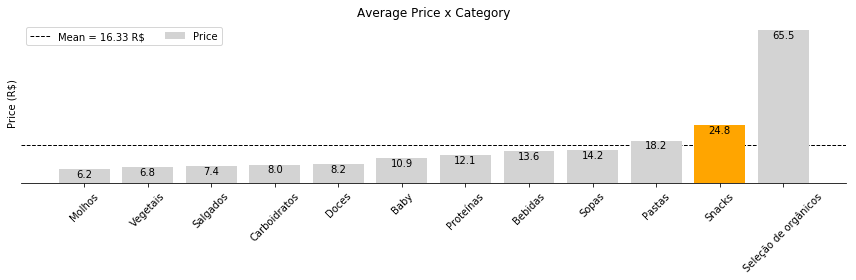

In [244]:
# Inicialização da figura
fig = plt.figure(figsize=(12, 4))

# Plots
plt.bar(x, y, label='Price', color=palette)
plt.axhline(y.mean(), color='k', ls='--', lw=1, label=f"Mean = {y.mean():.2f} R$", zorder=0)

for category, price in zip(categories, prices):
    s = round(price, 1)
    xy = (list(categories).index(category), s)
    plt.annotate(s, xy, ha='center', va='top', color='k')

# Estrutura da figura
plt.xticks(rotation=45)
plt.legend(ncol=2)
plt.yticks([])
plt.ylabel("Price (R$)")
plt.title("Average Price x Category")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('matplotlib_session.png', dpi=100)
plt.show()

In [240]:
plt.savefig('matplotlib_session.png', dpi=300)

<Figure size 432x288 with 0 Axes>